In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/


'22b1065 8 submission.pdf'
'Abalonethunder Lynx.zip'
'AI ML course.gdoc'
'AI_ML course.pdf'
 astronomy__22b1065.mp4
 Classroom
'Colab Notebooks'
'Contact Information.gform'
'Copy of Btp_report.docx'
'Copy of Btp_report.docx (1)_removed.docx'
'Copy of Copy of 2_SimpleCpp_BasicComputerOrganization.gslides'
'Crypto  hw 2Assignment.gdoc'
 cs104
'CS231 ASSIGNMENT.gdoc'
'CS406 hands-on 1.gdoc'
'CS 406 HANDS ON 4 WRITE UP.gdoc'
 CS406_Project.gdoc
 CS406_Project.pdf
 cs433.gdoc
'DAA ASSIGNMENT 2.gdoc'
 dataset
'document (2).pdf'
'Event Ideation.docx'
'Event Ideation.gdoc'
'event ideation krittika.gdoc'
'fake resume.gdoc'
'IE_project (1).pdf'
'ilovepdf_merged (3).pdf'
 main.tex
'memes 22B1065'
 memes.gdoc
'ms 101'
'ms report (2)_page-0005.pdf'
'ms report (2)_page-0009.pdf'
'ms report (2)_page-0010 (1).pdf'
 new
'Optimize the function.gdoc'
 pizza_vs_not
'Poolsword Thief.zip'
 references.bib
 REPORT.gdoc
 Report_sos_AI_22:.gdoc
 resources
'resume_22b1065 (1).pdf'
 resume_22b1065.pdf
'resume (2)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/train.csv')  # Adjust the path as needed

In [ ]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
data.shape

(404290, 6)

In [ ]:
df= data

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

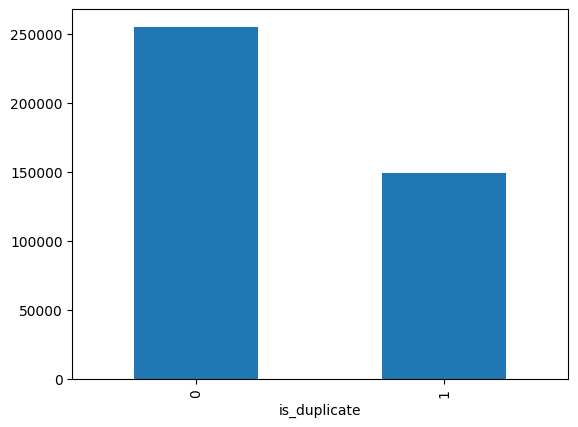

In [ ]:
#distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
#repeated questions not duplicated pairs
import numpy as np
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
a = np.unique(qid)
print(len(a))
x= qid.value_counts()>1
print(len(x[x==True].index))

537933
111780


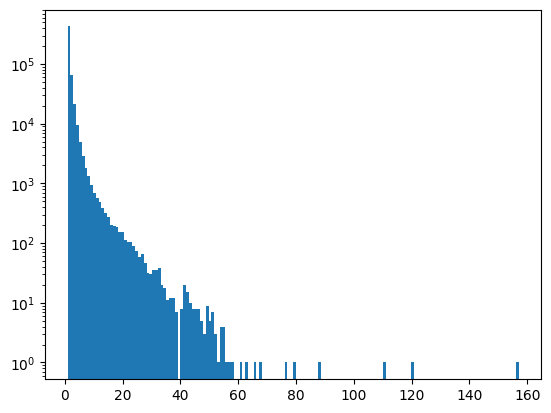

In [ ]:
#repeated questions histogram
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [ ]:
#doing without logic using random forest classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def preprocess(q):
    # Initialize the PorterStemmer
    stemmer = PorterStemmer()

    # Convert to lowercase and strip whitespaces
    q = str(q).lower().strip()

    # Remove specific special characters
    q = re.sub(r'[?|!|\'|"|#]', r'', q)
    q = re.sub(r'[.|,|)|(|\|/]', r' ', q)

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # Handle contractions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)
    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Remove HTML tags
    q = BeautifulSoup(q, "html.parser").get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    # Stemming
    q = ' '.join([stemmer.stem(word) for word in q.split()])

    return q

In [ ]:
preprocess({"I've already! wasn't <b>done</b>?"})

'ive alreadi wasnt done b'

In [ ]:
#dropping of nan values that occured before
df.dropna(inplace=True)
df.shape
new_df=df
new_df['question1']= new_df['question1'].apply(lambda x: preprocess(x))
new_df['question2']= new_df['question2'].apply(lambda x: preprocess(x))

In [ ]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,64,55,14,12
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,48,81,10,15
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,66,52,14,10
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...,0,43,55,11,13
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,70,37,13,7


# feature engineering
we have two question
char length of q1

char length of q2

words in q1

words in q2
common unique words

total words in q1 + total  number of words in q2

words common /word total

In [ ]:
def common_words(row):
  w_1  = set(map(lambda word:word.lower().strip(), row['question1'].split(" ")))
  w_2 = set(map(lambda word:word.lower().strip(), row['question2'].split(" ")))
  return len(w_1 & w_2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,64,55,14,12,11
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,48,81,10,15,7
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,66,52,14,10,5
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...,0,43,55,11,13,0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,70,37,13,7,4


In [ ]:
def total_words(row):
  return len(row['question1'].split(" ")) + len(row['question2'].split(" "))

In [ ]:
new_df['total_words'] = new_df.apply(total_words, axis=1)

In [ ]:
new_df['word_percent'] = round(new_df['word_common']/ new_df['total_words'], 2)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_percent
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,64,55,14,12,11,26,0.42
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,48,81,10,15,7,25,0.28
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,66,52,14,10,5,24,0.21
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...,0,43,55,11,13,0,24,0.00
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,70,37,13,7,4,20,0.20


minimum characters 0
maximum characters 564


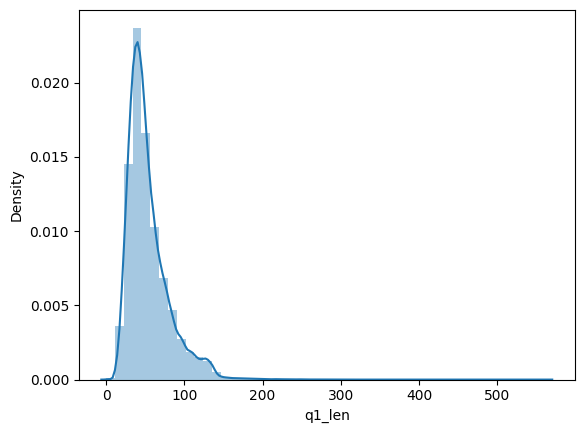

In [ ]:
#analysis of features
import seaborn as sns
sns.distplot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())

minimum characters 0
maximum characters 1060


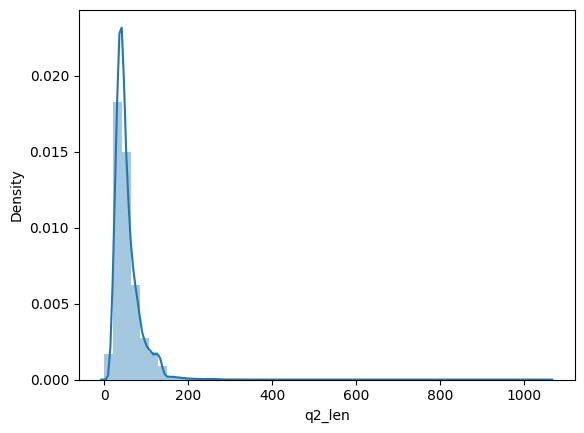

In [ ]:
import seaborn as sns
sns.distplot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())

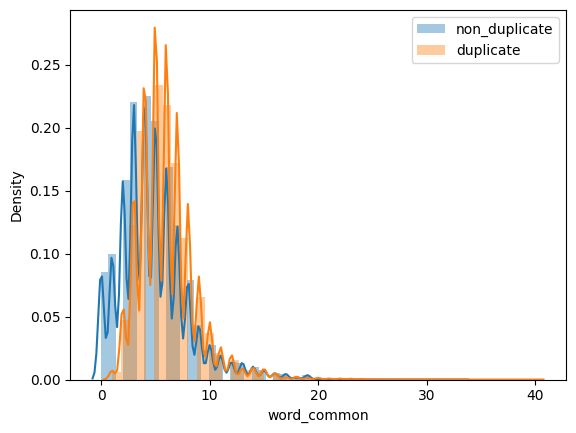

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the displot for non-duplicate and duplicate in a single figure
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'], label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'], label='duplicate')

# Add the legend
plt.legend()

# Show the plot
plt.show()


clearly after four words there is spike in number of pairs which are same

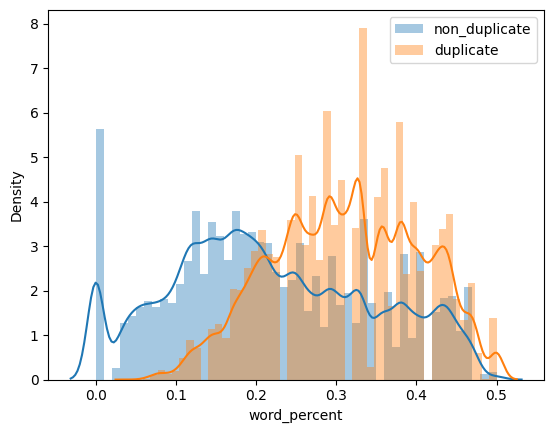

In [ ]:
#word - share
sns.distplot(df[df['is_duplicate']==0]['word_percent'], label='non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_percent'], label='duplicate')

plt.legend()
plt.show()

after 0.2 it is more chances

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_percent
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,64,55,14,12,11,26,0.42
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,48,81,10,15,7,25,0.28
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,66,52,14,10,5,24,0.21
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...,0,43,55,11,13,0,24,0.00
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,70,37,13,7,4,20,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how mani keyword are there in the racket progr...,how mani keyword are there in perl program lan...,0,78,72,14,13,11,27,0.41
404286,404286,18840,155606,do you believ there is life after death,is it true that there is life after death,1,39,41,8,9,5,17,0.29
404287,404287,537928,537929,what is one coin,what thi coin,0,16,13,4,3,2,7,0.29
404288,404288,537930,537931,what is the approx annual cost of live while s...,i am have littl hairfal problem but i want to ...,0,87,118,17,25,1,42,0.02


In [ ]:
import nltk

In [ ]:
#advanced features
nltk.download('stopwords')
from nltk.corpus import stopwords
def fetch_token_features(row):
  q1 = row['question1']
  q2 = row['question2']
  SAFE_DIV = 0.0001
  STOP_WORDS = stopwords.words("english")

  token_features = [0.0]*8

  #converting the sentence into tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  #get the non-stop words in questions
  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  #get the stopwords in questions
  q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

  #common words
  common_words = q1_words.intersection(q2_words)

  #common stops
  common_stops = q1_stops.intersection(q2_stops)

  common_tokens = set(q1_tokens).intersection(set(q2_tokens))


  token_features[0] = len(common_words)/(min(len(q1_words), len(q2_words))+SAFE_DIV)
  token_features[1] = len(common_words)/(max(len(q1_words),  len(q2_stops)) +SAFE_DIV)

  token_features[2] = len(common_stops)/(min(len(q1_stops), len(q2_stops))+SAFE_DIV)
  token_features[3] = len(common_stops)/(max(len(q1_stops), len(q2_stops))+SAFE_DIV)

  token_features[4] = len(common_tokens)/(min(len(q1_tokens), len(q2_tokens))+SAFE_DIV)
  token_features[5] = len(common_tokens)/(max(len(q1_tokens), len(q2_tokens))+SAFE_DIV)

  #last/first word of both question is same or not
  token_features[6] = int(q1_tokens[-1]==q2_tokens[-1])
  token_features[7] = int(q1_tokens[0]==q2_tokens[0])


  return token_features




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_percent,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,64,55,14,12,...,26,0.42,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,48,81,10,15,...,25,0.28,0.799984,0.799984,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,66,52,14,10,...,24,0.21,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0.0,1.0
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...,0,43,55,11,13,...,24,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,70,37,13,7,...,20,0.20,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


In [ ]:
!pip install Distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=ff86b2de2a49ed8c0f2d08d4a12990ab19c7070a571a221e1919deb696cde933
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance


In [ ]:
import distance
def length_features(row):
  q1 = row['question1']
  q2 = row['question2']

  SAFE_DIV = 0.0001

  length_features =[0.0]*3

  q1_tokens = q1.split()
  q2_tokens = q2.split()
  if(len(q1_tokens) == 0) | (len(q2_tokens) == 0):
    return length_features

  #lengths of questions
  length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
  length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

  lc_substrings = list(distance.lcsubstrings(q1, q2))
  if lc_substrings:
      longest_substring_length = len(lc_substrings[0])
      length_features[2] = longest_substring_length / (min(len(q1), len(q2)) + 1)
  return length_features

In [ ]:
length_features = new_df.apply(length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,64,55,14,12,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.982143
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,48,81,10,15,...,0.799984,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,0.571429
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,66,52,14,10,...,0.499992,0.399992,0.249997,0.499995,0.357140,0.0,1.0,4.0,12.0,0.188679
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...,0,43,55,11,13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,0.045455
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,70,37,13,7,...,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,0.157895


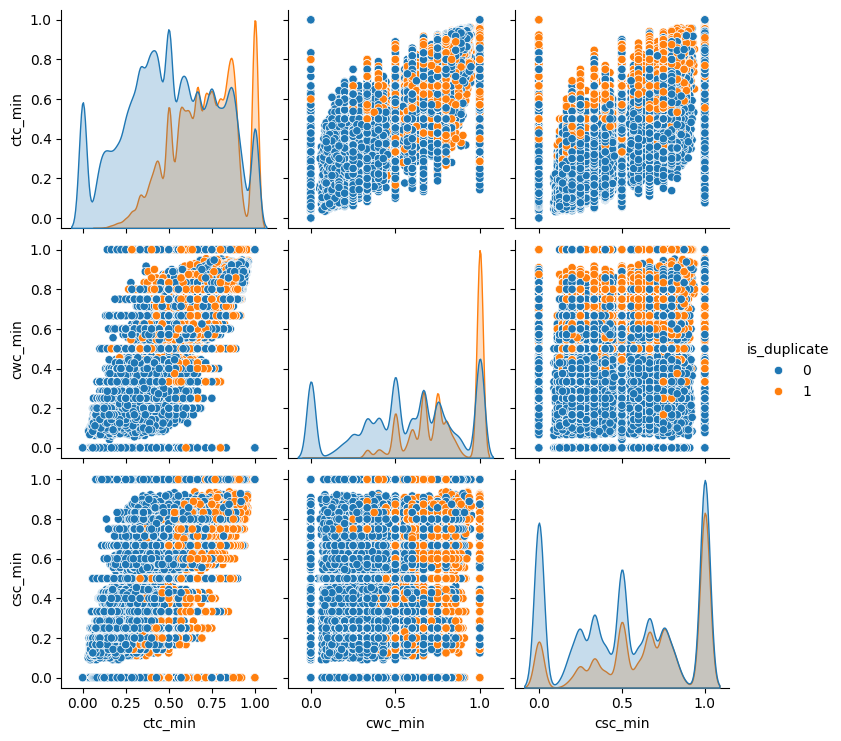

In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min' , 'csc_min', 'is_duplicate']], hue ='is_duplicate')

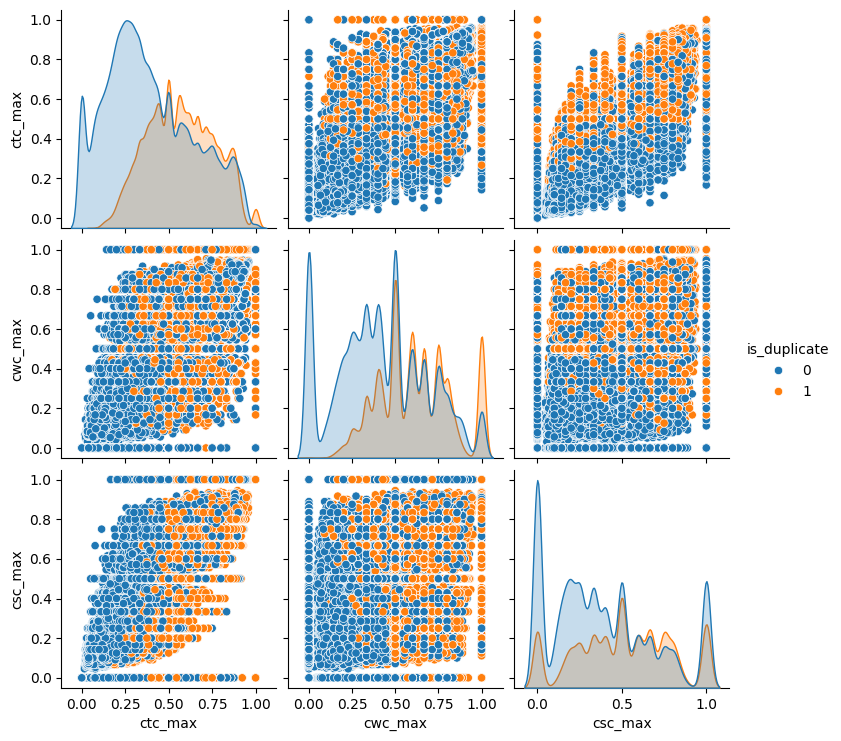

In [ ]:
sns.pairplot(new_df[['ctc_max', 'cwc_max' , 'csc_max', 'is_duplicate']], hue ='is_duplicate')

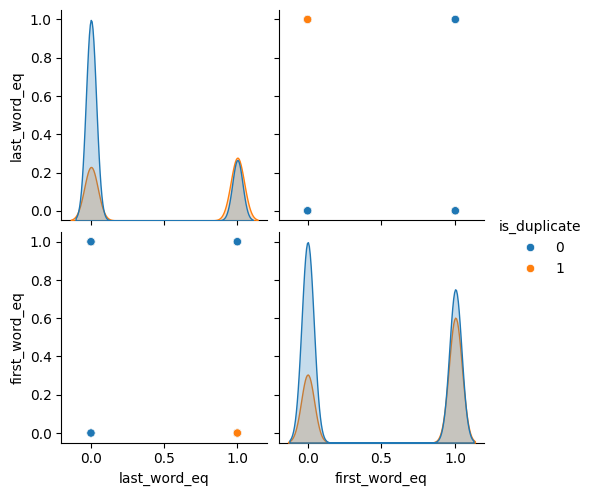

In [ ]:
sns.pairplot(new_df[['last_word_eq' , 'first_word_eq', 'is_duplicate']], hue ='is_duplicate')

In [ ]:
ques_df = new_df[['question1', 'question2']]

In [ ]:
ques_df.head()

,question1,question2
0,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...
1,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...
2,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...
3,whi am i mental veri lone how can i solv it,find the remaind when math 23 24 math is divid...
4,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water


In [ ]:
final_df = new_df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_percent,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,64,55,14,12,11,26,0.42,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.982143
1,0,48,81,10,15,7,25,0.28,0.799984,0.799984,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,0.571429
2,0,66,52,14,10,5,24,0.21,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0.0,1.0,4.0,12.0,0.188679
3,0,43,55,11,13,0,24,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,0.045455
4,0,70,37,13,7,4,20,0.20,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,0.157895


In [ ]:
from gensim.models import Word2Vec
questions = list(ques_df['question1']) + list(ques_df['question2'])
word2vec_model = Word2Vec(sentences=questions, vector_size=100, window=5, min_count=1, workers=4)
def sentence_to_vec(sentence, model):
    vector = np.zeros(model.vector_size)
    num_words = 0
    for word in sentence:
        if word in model.wv:
            vector += model.wv[word]
            num_words += 1
    if num_words > 0:
        vector /= num_words
    return vector

# Convert questions to Word2Vec vectors
q1_vectors = np.array([sentence_to_vec(question, word2vec_model) for question in questions[:len(ques_df)]])
q2_vectors = np.array([sentence_to_vec(question, word2vec_model) for question in questions[len(ques_df):]])

In [ ]:
# Create DataFrames from arrays
temp_df1 = pd.DataFrame(q1_vectors, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_vectors, index=ques_df.index)

# Concatenate the DataFrames
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.225499,0.263695,-0.119510,-0.390812,0.137601,-0.056733,-0.197178,0.016034,-0.062177,0.111638,...,0.394566,-0.377286,-0.330791,0.337429,-0.263685,-0.276356,0.218721,-0.024766,0.181726,-0.277063
1,0.294918,0.196668,0.000116,-0.452189,0.125384,-0.108029,-0.140393,-0.054605,0.000291,0.166525,...,0.393913,-0.357683,-0.280058,0.388005,-0.290611,-0.297191,0.203611,0.086172,0.165682,-0.312386
2,0.256326,0.289949,-0.090054,-0.423272,0.135281,-0.087758,-0.163875,0.057975,-0.073158,0.103055,...,0.383109,-0.344546,-0.293926,0.368957,-0.273317,-0.312226,0.184207,0.008839,0.190463,-0.297187
3,0.254908,0.277872,-0.088428,-0.426319,0.198420,-0.125849,-0.165375,0.041567,0.021252,0.110978,...,0.070539,-0.239548,-0.152542,0.269741,-0.140125,-0.172535,0.197779,0.067194,0.222578,-0.281136
4,0.273244,0.220587,-0.051007,-0.450473,0.132087,-0.103560,-0.137489,-0.004209,-0.049453,0.132900,...,0.424025,-0.379305,-0.313996,0.399378,-0.286043,-0.268668,0.222411,0.001461,0.153265,-0.349233


In [ ]:
final_df = pd.concat([final_df,temp_df], axis =1)
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_percent,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,64,55,14,12,11,26,0.42,0.999980,0.833319,...,0.394566,-0.377286,-0.330791,0.337429,-0.263685,-0.276356,0.218721,-0.024766,0.181726,-0.277063
1,0,48,81,10,15,7,25,0.28,0.799984,0.799984,...,0.393913,-0.357683,-0.280058,0.388005,-0.290611,-0.297191,0.203611,0.086172,0.165682,-0.312386
2,0,66,52,14,10,5,24,0.21,0.599988,0.499992,...,0.383109,-0.344546,-0.293926,0.368957,-0.273317,-0.312226,0.184207,0.008839,0.190463,-0.297187
3,0,43,55,11,13,0,24,0.00,0.000000,0.000000,...,0.070539,-0.239548,-0.152542,0.269741,-0.140125,-0.172535,0.197779,0.067194,0.222578,-0.281136
4,0,70,37,13,7,4,20,0.20,0.399992,0.199998,...,0.424025,-0.379305,-0.313996,0.399378,-0.286043,-0.268668,0.222411,0.001461,0.153265,-0.349233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,78,72,14,13,11,27,0.41,0.857131,0.857131,...,0.422420,-0.369539,-0.326247,0.371574,-0.274563,-0.294131,0.203721,0.031137,0.235187,-0.340769
404286,1,39,41,8,9,5,17,0.29,0.666644,0.399992,...,0.381176,-0.356126,-0.282743,0.258768,-0.221697,-0.223304,0.239636,-0.009420,0.219164,-0.244449
404287,0,16,13,4,3,2,7,0.29,0.499975,0.499975,...,0.361910,-0.315077,-0.329137,0.408101,-0.178124,-0.255123,0.108973,-0.040262,0.110971,-0.285309
404288,0,87,118,17,25,1,42,0.02,0.000000,0.000000,...,0.376113,-0.355034,-0.306309,0.352093,-0.240816,-0.277819,0.215249,0.053560,0.193326,-0.310549


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:, 0].values, test_size =0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8028148111504119

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

we need to check confusion metrics of right upper end as it si data that they are not different but showed in same this is our main issue


In [ ]:
print(cm)

NameError: name 'cm' is not defined